<a href="https://colab.research.google.com/github/gozygreg/Heart-Failure-Project/blob/main/Heart_Failure_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Project

Based on the csv and using all the features, an attempt to use a simple logistic regression model to classify patients.

Notes
---
- No feature has been removed as requested
- Features are not weighed
- All patients are used i.e. patients > 365 days are included.


## Setup

In [ ]:
#  Install required packages
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration

In [ ]:
# Upload data CSV file
from google.colab import files
uploaded = files.upload()

Saving Heart Failure Model.csv to Heart Failure Model.csv


In [ ]:
# Read the uploaded file
df = pd.read_csv('Heart Failure Model.csv')

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340   

## Data Preprocessing

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Create copy to avoid modifications to original data
data = df.copy()

In [ ]:
# Convert categorical variables to dummy variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_features)

In [ ]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
print("\nFeatures after preprocessing:")
print(X.columns.tolist())


Features after preprocessing:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


## Data Visualisation

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Target Variable')

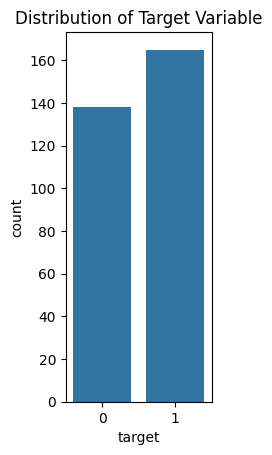

In [ ]:
# Plot 1: Target Distribution
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')

Text(0.5, 1.0, 'Age Distribution by Target')

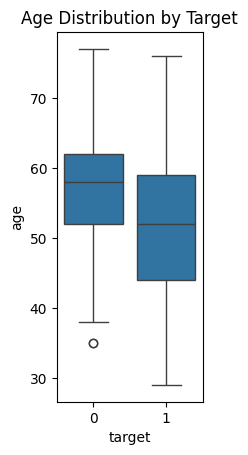

In [ ]:
# Plot 2: Age Distribution by Target
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Target')

Text(0.5, 1.0, 'Correlation Heatmap')

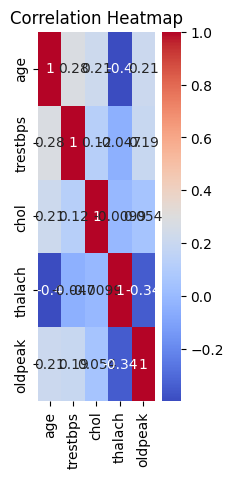

In [ ]:
# Plot 3: Correlation Heatmap of Numerical Features
plt.subplot(1, 3, 3)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Model Training and Evaluation

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Calculate and display metrics
print("Model Performance Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC AUC Score: 0.9321120689655172


## Feature Importance Analysis


In [ ]:
# Calculate feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
importance = importance.sort_values('importance', ascending=False)

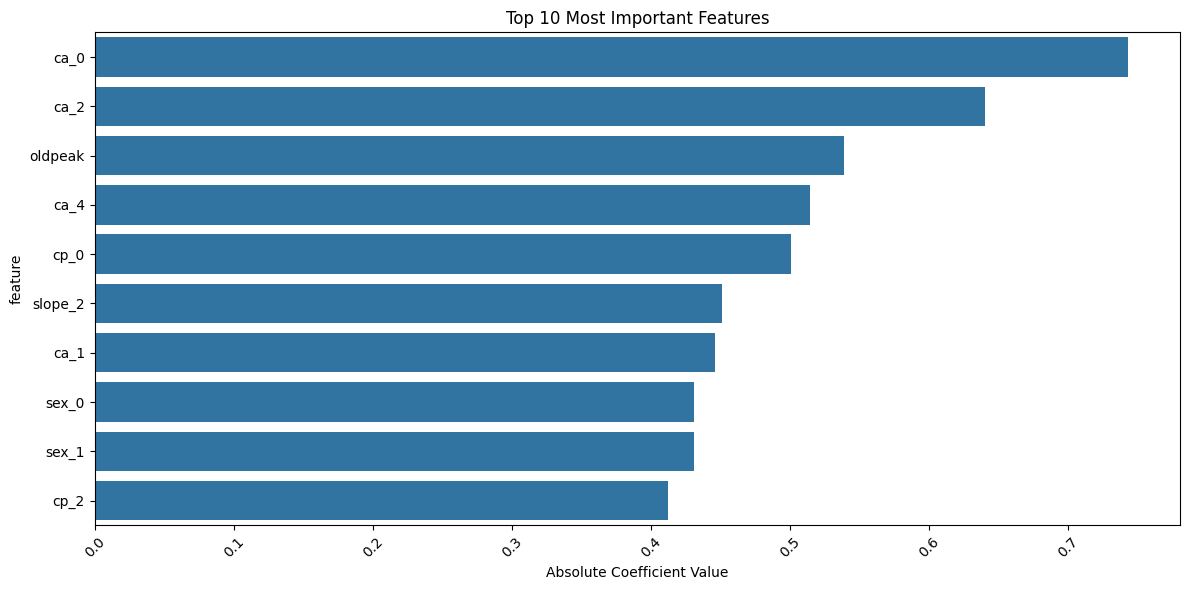

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prediction Function for New Patients

In [ ]:
def predict_risk(patient_data):
    """
    Make predictions for new patient data.
    patient_data should be a dictionary with the same features as the training data
    """
    # Convert single patient data to DataFrame
    patient_df = pd.DataFrame([patient_data])

    # Convert categorical variables to dummy variables
    patient_df = pd.get_dummies(patient_df, columns=categorical_features)

    # Ensure all columns from training data are present
    for col in X.columns:
        if col not in patient_df.columns:
            patient_df[col] = 0

    # Reorder columns to match training data
    patient_df = patient_df[X.columns]

    # Scale the features
    patient_scaled = scaler.transform(patient_df)

    # Make prediction
    risk_probability = model.predict_proba(patient_scaled)[0][1]

    return risk_probability

In [ ]:
# Example usage of the prediction function
example_patient = {
    'age': 65,
    'sex': 1,
    'cp': 0,
    'trestbps': 140,
    'chol': 250,
    'fbs': 1,
    'restecg': 0,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 0,
    'ca': 0,
    'thal': 1
}

In [ ]:
risk_prob = predict_risk(example_patient)
print(f"Predicted risk probability for example patient: {risk_prob:.2f}")

Predicted risk probability for example patient: 0.47


## Save the model

In [ ]:
import pickle

# Save the model and scaler
with open('heart_model.pkl', 'wb') as f:
    pickle.dump((model, scaler, X.columns), f)

print("Model saved as 'heart_model.pkl'")

Model saved as 'heart_model.pkl'


In [ ]:
# Download the model file
from google.colab import files
files.download('heart_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>